# Valores y vectores singulares de una matriz

En lo que sigue se supone $A \in \mathbb{R}^{mxn}$.

## Valor singular

El número $\sigma$ se denomina valor *singular* de $A$ si $\sigma = \sqrt{\lambda_{A^TA}} = \sqrt{\lambda_{AA^T}}$ donde: $\lambda_{A^TA}$ y $\lambda_{AA^T}$ es eigenvalor de $A^TA$ y $AA^T$ respectivamente .

**Obs:** la definición se realiza sobre $A^TA$ o $AA^T$ pues éstas matrices tienen el mismo espectro y además sus eigenvalores son reales y no negativos por lo que $\sigma \in \mathbb{R}$ y de hecho $\sigma \geq 0$ (la raíz cuadrada se calcula para un eigenvalor no negativo).

## Vector singular izquierdo, vector singular derecho

Asociado con cada valor singular $\sigma$ existen vectores singulares $u,v$ que cumplen con la igualdad: $$Av = \sigma u .$$ Al vector $u$ se le nombra vector singular *izquierdo* y al vector $v$ se le nombra vector singular *derecho*.

## Descomposición en valores singulares (SVD)

Si $A \in \mathbb{R}^{mxn}$ entonces existen $U \in \mathbb{R}^{mxm}, V \in \mathbb{R}^{nxn}$ ortogonales tales que: $A = U\Sigma V^T$ con $\Sigma = diag(\sigma_1, \sigma_2, \dots, \sigma_p) \in \mathbb{R}^{mxn}$, $p = \min\{m,n\}$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_p \geq 0$.

**Obs:** La notación $\sigma_1$ hace referencia al valor singular más grande de A, $\sigma_2$ al segundo valor singular más grande de A y así sucesivamente.

**Obs2:** La SVD que se definió arriba es nombrada *SVD full*, hay una forma **truncada** en la que $U \in \mathbb{R}^{mxk}$, $V \in \mathbb{R}^{nxk}$ y $\Sigma \in \mathbb{R}^{kxk}$.

Existen diferentes propiedades de los valores y vectores singulares, aquí se enlistan algunas:

* Si $rank(A) = r$ entonces $r \leq p$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > \sigma_{r+1} = \sigma_{r+2} = \dots = \sigma_p =  0$.

* Si $rank(A) = r$ entonces $A = \displaystyle \sum_{i=0}^r \sigma_i u_i v_i^T$ con $u_i$ $i$-ésima columna de U y $v_i$ $i$-ésima columna de V.

* Geométricamente los valores singulares de una matriz $A \in \mathbb{R}^{mxn}$ son las longitudes de los semiejes del hiperelipsoide $E$ definido por $E = \{Ax : ||x|| \leq 1, \text{ con } ||\cdot || \text{ norma Euclidiana}\}$ y los vectores $u_i$ son direcciones de estos semiejes; los vectores $vi$'s tienen norma igual a $1$ por lo que se encuentran en una circunferencia de radio igual a $1$ y como $Av_i = \sigma u_i$ entonces $A$ mapea los vectores $v_i$'s a los semiejes $u_i$'s respectivamente:


<img src="https://dl.dropboxusercontent.com/s/xbuepon355pralw/svd_2.jpg?dl=0" heigth="700" width="700">

* La SVD da bases ortogonales para los $4$ espacios fundamentales de una matriz: espacio columna, espacio nulo izquierdo, espacio nulo y espacio renglón:

<img src="https://dl.dropboxusercontent.com/s/uo9s9f0nqi43s6d/svd_four_spaces_of_matrix.png?dl=0" heigth="600" width="600">


* Si $t < r$ y $r=rank(A)$ entonces $A_t =  \displaystyle \sum_{i=0}^t \sigma_i u_i v_i^T$ es una matriz de entre todas las matrices con $rank$ igual a t, que es más *cercana* a A (la cercanía se mide con una norma **matricial**).

Entre las aplicaciones de la SVD se encuentran:

* Procesamiento de imágenes y señales.
* Sistemas de recomendación (Netflix).
* Mínimos cuadrados.
* Componentes principales.
* Reconstrucción de imágenes.

## En numpy ...

**En numpy con el módulo linalg podemos calcular la SVD de A, obsérvese en la ayuda [numpy.linalg.svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) que se regresa $V^T$ y no $V$:**

In [1]:
import numpy as np
import pandas as pd
import pprint

### Ejemplo 1: producto $U \Sigma V^T$ igual a $A$ 

In [2]:
A = np.array([[1,-1],[1,-2],[1,-1]])

In [3]:
print('A:')
pprint.pprint(A)

A:
array([[ 1, -1],
       [ 1, -2],
       [ 1, -1]])


In [4]:
U,S,V_T = np.linalg.svd(A) #V^T is what we get, not V

In [5]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:')
pprint.pprint(V_T)

U:
array([[-4.69829451e-01,  5.28450837e-01, -7.07106781e-01],
       [-7.47342340e-01, -6.64439182e-01, -4.43378006e-17],
       [-4.69829451e-01,  5.28450837e-01,  7.07106781e-01]])
Sigma:
array([2.96175655, 0.47749149])
V^T:
array([[-0.56959484,  0.82192562],
       [ 0.82192562,  0.56959484]])


In [6]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

dimensiones de U: (3, 3)
dimensiones de S: (2,)
dimensiones de V: (2, 2)


Comprobación:

In [7]:
r, =S.shape
print('U*S*V^T:')
pprint.pprint((U[:,:r]*S)@V_T)
print('A:')
pprint.pprint(A)

U*S*V^T:
array([[ 1., -1.],
       [ 1., -2.],
       [ 1., -1.]])
A:
array([[ 1, -1],
       [ 1, -2],
       [ 1, -1]])


### Ejemplo 2: producto $U \Sigma V^T$ igual a $A$ 

SVD truncada:

In [8]:
A = np.array([[1,1,-2],[1,-1,1]])

In [9]:
print('A:')
pprint.pprint(A)

A:
array([[ 1,  1, -2],
       [ 1, -1,  1]])


In [10]:
U,S,V_T = np.linalg.svd(A,full_matrices=False) #we want a truncated version
                                               #equal to rank of A

In [11]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:') #V^T is what we get, not V
pprint.pprint(V_T)

U:
array([[-0.89442719,  0.4472136 ],
       [ 0.4472136 ,  0.89442719]])
Sigma:
array([2.64575131, 1.41421356])
V^T:
array([[-1.69030851e-01, -5.07092553e-01,  8.45154255e-01],
       [ 9.48683298e-01, -3.16227766e-01, -2.10280431e-16]])


In [12]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

dimensiones de U: (2, 2)
dimensiones de S: (2,)
dimensiones de V: (3, 2)


Comprobación:

In [13]:
r, =S.shape
print('U*S*V^T:')
pprint.pprint((U*S)@V_T)
print('A:')
pprint.pprint(A)

U*S*V^T:
array([[ 1.,  1., -2.],
       [ 1., -1.,  1.]])
A:
array([[ 1,  1, -2],
       [ 1, -1,  1]])


### Ejemplo 3: *rank* de $A$ igual al número de valores singulares diferentes de cero

In [14]:
A = np.array([[1, 1],
              [1, 2],
              [1, 3],
              [1, 4]])

In [15]:
np.linalg.matrix_rank(A)

2

In [16]:
U,S,V_T = np.linalg.svd(A) #V^T is what we get, not V

In [17]:
print(S)

[5.77937881 0.77380911]


In [18]:
tol = 1e-8

In [19]:
np.sum(S>tol)

2

In [20]:
pprint.pprint(S)

array([5.77937881, 0.77380911])


### Ejemplo 4: rank de A igual al número de valores singulares diferentes de cero

In [21]:
A

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [22]:
new_column = A[:,0] + .5*A[:,1]

In [23]:
m,n = A.shape

In [24]:
new_column = new_column.reshape(m, 1)

In [25]:
A = np.hstack((A, new_column))

In [26]:
pprint.pprint(A)

array([[1. , 1. , 1.5],
       [1. , 2. , 2. ],
       [1. , 3. , 2.5],
       [1. , 4. , 3. ]])


In [27]:
np.linalg.matrix_rank(A)

2

In [28]:
U,S,V_T = np.linalg.svd(A) #V^T is what we get, not V

In [29]:
print(S)

[7.39438872e+00 9.07201958e-01 2.61562175e-16]


In [30]:
np.sum(S>tol)

2

In [31]:
pprint.pprint(S)

array([7.39438872e+00, 9.07201958e-01, 2.61562175e-16])


In [32]:
pprint.pprint(U)

array([[-0.26118857,  0.79484623,  0.54102614,  0.08538568],
       [-0.40315493,  0.37076422, -0.65772546, -0.51710466],
       [-0.54512128, -0.0533178 , -0.30762751,  0.77805226],
       [-0.68708764, -0.47739981,  0.42432683, -0.34633329]])


In [33]:
pprint.pprint(V_T)

array([[-0.25648536, -0.73720939, -0.62509005],
       [ 0.69983628, -0.58771694,  0.40597781],
       [ 0.66666667,  0.33333333, -0.66666667]])


Las columnas de la tres a la cuatro de la matriz $U$ pertenecen al espacio nulo izquierdo de $A$:

In [34]:
A.T@U[:,2] #third column of U

array([ 5.55111512e-17, -2.22044605e-16,  0.00000000e+00])

In [35]:
A.T@U[:,3] #fourth column of U

array([1.11022302e-16, 2.22044605e-16, 1.11022302e-16])

Las columna tres de la matriz $V$ pertenece al espacio nulo de $A$:

In [36]:
A@V_T[2, :] #we take second row of V_T as V^T is what numpy svd func returns

array([-4.44089210e-16, -2.22044605e-16,  0.00000000e+00,  0.00000000e+00])

## Recomendación de películas por preferencias de una persona en el género de acción

Supóngase que se tiene el siguiente *data frame* que contiene un valor numérico para cada película de acuerdo si es del género de acción. Tiene un valor de $-1$ si no es de acción y de $1$ si es de acción.

In [37]:
d = {"G.I. Joe: The Rise of Cobra": 1,
     "Casino Royale": 1,
     "Iron Man": 1,
     "The Day After Tomorrow": 1,
     "X-Men: Days of Future Past": 1,
     "The Fault in our Stars": -1,
     "The Firm": -1,
     "Captain Phillips": 1,
     "Train to busan": 1,
     "The Babadook": -1,
     "Ex Machina": -1,
     "Inglourious Basterds": 1,
     "The Blair Witch Project": -1,
     "Blade Runner 2049": 1,
     "Star Wars: A New Hope": 1,
     "The Fifth Element": 1,
     "Arrival": -1,
     "Inception": 1
     }
attribute_movies = "degree_of_action"

df_movies = pd.DataFrame(data={"movies":d.keys(), 
                               attribute_movies:d.values()})

In [38]:
print(df_movies)

                         movies  degree_of_action
0   G.I. Joe: The Rise of Cobra                 1
1                 Casino Royale                 1
2                      Iron Man                 1
3        The Day After Tomorrow                 1
4    X-Men: Days of Future Past                 1
5        The Fault in our Stars                -1
6                      The Firm                -1
7              Captain Phillips                 1
8                Train to busan                 1
9                  The Babadook                -1
10                   Ex Machina                -1
11         Inglourious Basterds                 1
12      The Blair Witch Project                -1
13            Blade Runner 2049                 1
14        Star Wars: A New Hope                 1
15            The Fifth Element                 1
16                      Arrival                -1
17                    Inception                 1


Supongamos que tenemos $20$ personas que nos dan sus grados de interés en las películas de acción. Un valor más grande indica un grado de interés mayor en el género de acción.

In [39]:
np.random.seed(1000) #para reproducibilidad
m_persons = 20
u = np.random.rand(m_persons)
attribute_persons = "degree_of_interest_in_action"
df_persons = pd.DataFrame(data={"persona": range(m_persons),
                                attribute_persons: u})

In [40]:
print(df_persons.round(2))

    persona  degree_of_interest_in_action
0         0                          0.65
1         1                          0.12
2         2                          0.95
3         3                          0.48
4         4                          0.87
5         5                          0.21
6         6                          0.04
7         7                          0.40
8         8                          0.23
9         9                          0.84
10       10                          0.21
11       11                          0.74
12       12                          0.39
13       13                          0.18
14       14                          0.74
15       15                          0.07
16       16                          0.89
17       17                          0.95
18       18                          0.93
19       19                          0.42


Por ejemplo para la persona $15$

In [41]:
person = 15
degree_of_action_person = df_persons[attribute_persons][person]

In [42]:
print(degree_of_action_person.round(2))

0.07


Y podemos calcular con estos datos el grado de interés que tendría la persona para el conjunto de películas:

In [43]:
interest_for_action_movies_person = df_movies.apply(lambda col: degree_of_action_person*col if col.name == attribute_movies else col)
attribute_person_example = "degree_of_action_person"
interest_for_action_movies_person.rename(columns={attribute_movies: attribute_person_example}, inplace=True)

In [44]:
interest_for_action_movies_person.sort_values(by=attribute_person_example).round(2)

,movies,degree_of_action_person
12,The Blair Witch Project,-0.07
5,The Fault in our Stars,-0.07
6,The Firm,-0.07
16,Arrival,-0.07
9,The Babadook,-0.07
10,Ex Machina,-0.07
0,G.I. Joe: The Rise of Cobra,0.07
15,The Fifth Element,0.07
14,Star Wars: A New Hope,0.07
13,Blade Runner 2049,0.07


Para la persona 2

In [45]:
person = 2
degree_of_action_person = df_persons[attribute_persons][person]

In [46]:
print(degree_of_action_person.round(2))

0.95


Y su grado de interés que tendría la persona para el conjunto de películas:

In [47]:
interest_for_action_movies_person_b = df_movies.apply(lambda col: degree_of_action_person*col if col.name == attribute_movies else col)
attribute_person_example = "degree_of_action_person"
interest_for_action_movies_person_b.rename(columns={attribute_movies: attribute_person_example}, inplace=True)

In [48]:
interest_for_action_movies_person_b.sort_values(by=attribute_person_example,ascending=False).round(2)

,movies,degree_of_action_person
0,G.I. Joe: The Rise of Cobra,0.95
8,Train to busan,0.95
15,The Fifth Element,0.95
14,Star Wars: A New Hope,0.95
13,Blade Runner 2049,0.95
11,Inglourious Basterds,0.95
1,Casino Royale,0.95
17,Inception,0.95
7,Captain Phillips,0.95
4,X-Men: Days of Future Past,0.95


Si sólo pudiéramos clasificar el gusto por las películas de acuerdo al: género de acción y la preferencia de la persona por el género de acción, tendríamos una matriz que representaría la combinación de estas dos características en:

In [49]:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [50]:
v = np.array(list(d.values()))
person_movies = pd.DataFrame(np.outer(u,v))
X = person_movies.rename(columns={k:movie for k, movie in enumerate(d.keys())}, 
                         index={k:"person" + str(k) for k in range(0, m_persons)})

In [51]:
X.round(2).head()

,G.I. Joe: The Rise of Cobra,Casino Royale,Iron Man,The Day After Tomorrow,X-Men: Days of Future Past,The Fault in our Stars,The Firm,Captain Phillips,Train to busan,The Babadook,Ex Machina,Inglourious Basterds,The Blair Witch Project,Blade Runner 2049,Star Wars: A New Hope,The Fifth Element,Arrival,Inception
person0,0.65,0.65,0.65,0.65,0.65,-0.65,-0.65,0.65,0.65,-0.65,-0.65,0.65,-0.65,0.65,0.65,0.65,-0.65,0.65
person1,0.12,0.12,0.12,0.12,0.12,-0.12,-0.12,0.12,0.12,-0.12,-0.12,0.12,-0.12,0.12,0.12,0.12,-0.12,0.12
person2,0.95,0.95,0.95,0.95,0.95,-0.95,-0.95,0.95,0.95,-0.95,-0.95,0.95,-0.95,0.95,0.95,0.95,-0.95,0.95
person3,0.48,0.48,0.48,0.48,0.48,-0.48,-0.48,0.48,0.48,-0.48,-0.48,0.48,-0.48,0.48,0.48,0.48,-0.48,0.48
person4,0.87,0.87,0.87,0.87,0.87,-0.87,-0.87,0.87,0.87,-0.87,-0.87,0.87,-0.87,0.87,0.87,0.87,-0.87,0.87


Lo anterior podemos capturarlo con la SVD utilizando el valor singular más grande y los vectores singulares asociados.

In [52]:
U, S, V_T = np.linalg.svd(X)

In [53]:
largest_singular_value = S[0]
left_singular_vector_of_largest_singular_value = U[:,0]
right_singular_vector_of_largest_singular_value = V_T[0,:]

In [54]:
def recommendation_of_action_movies(person):
    return largest_singular_value*left_singular_vector_of_largest_singular_value[person]*right_singular_vector_of_largest_singular_value

In [55]:
person = 15
interest_for_movies_person_2 = df_movies.assign(degree_of_action_person_svd=lambda df_movies: recommendation_of_action_movies(person))
interest_for_movies_person_2.drop(attribute_movies, axis=1,inplace=True)
attribute_person_example_svd = "degree_of_action_person_svd"

In [56]:
interest_for_movies_person_2.sort_values(by=attribute_person_example_svd).round(2)

,movies,degree_of_action_person_svd
12,The Blair Witch Project,-0.07
5,The Fault in our Stars,-0.07
6,The Firm,-0.07
16,Arrival,-0.07
9,The Babadook,-0.07
10,Ex Machina,-0.07
0,G.I. Joe: The Rise of Cobra,0.07
15,The Fifth Element,0.07
14,Star Wars: A New Hope,0.07
13,Blade Runner 2049,0.07


In [57]:
interest_for_action_movies_person.sort_values(by=attribute_person_example).round(2)

,movies,degree_of_action_person
12,The Blair Witch Project,-0.07
5,The Fault in our Stars,-0.07
6,The Firm,-0.07
16,Arrival,-0.07
9,The Babadook,-0.07
10,Ex Machina,-0.07
0,G.I. Joe: The Rise of Cobra,0.07
15,The Fifth Element,0.07
14,Star Wars: A New Hope,0.07
13,Blade Runner 2049,0.07


In [58]:
person = 2
interest_for_movies_person_b_2 = df_movies.assign(degree_of_action_person_svd=lambda df_movies: recommendation_of_action_movies(person))
interest_for_movies_person_b_2.drop(attribute_movies, axis=1,inplace=True)
attribute_person_example_svd = "degree_of_action_person_svd"

In [59]:
interest_for_movies_person_b_2.sort_values(by=attribute_person_example_svd,ascending=False).round(2)

,movies,degree_of_action_person_svd
1,Casino Royale,0.95
17,Inception,0.95
11,Inglourious Basterds,0.95
2,Iron Man,0.95
3,The Day After Tomorrow,0.95
4,X-Men: Days of Future Past,0.95
15,The Fifth Element,0.95
14,Star Wars: A New Hope,0.95
7,Captain Phillips,0.95
8,Train to busan,0.95


In [60]:
interest_for_action_movies_person_b.sort_values(by=attribute_person_example,ascending=False).round(2)

,movies,degree_of_action_person
0,G.I. Joe: The Rise of Cobra,0.95
8,Train to busan,0.95
15,The Fifth Element,0.95
14,Star Wars: A New Hope,0.95
13,Blade Runner 2049,0.95
11,Inglourious Basterds,0.95
1,Casino Royale,0.95
17,Inception,0.95
7,Captain Phillips,0.95
4,X-Men: Days of Future Past,0.95


Esto es un ejemplo muy simple de recomendación de películas de acuerdo a preferencias por el género de acción. En general las preferencias por las películas tienen más combinaciones entre las características que hacen que a una persona le guste una película. También las películas tienden a tener diferentes combinaciones de géneros. Además los valores numéricos sólo son $-1$ o $1$ que también puede mejorarse.

# Aplicación: reconstrucción de imágenes

Dentro de las aplicaciones de la SVD de una matriz se encuentra la de reconstrucción de imágenes.

## En numpy y matplotlib ...

In [61]:
import matplotlib.pyplot as plt

In [62]:
img=plt.imread('Kiara.png')

ver: [matplotlib.pyplot.imread](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imread.html)

In [63]:
img #Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0

array([[[0.77, 0.53, 0.31, 1.  ],
        [0.77, 0.53, 0.31, 1.  ],
        [0.78, 0.54, 0.32, 1.  ],
        ...,
        [0.85, 0.63, 0.4 , 1.  ],
        [0.85, 0.63, 0.39, 1.  ],
        [0.84, 0.62, 0.39, 1.  ]],

       [[0.77, 0.53, 0.32, 1.  ],
        [0.77, 0.53, 0.32, 1.  ],
        [0.78, 0.54, 0.32, 1.  ],
        ...,
        [0.86, 0.64, 0.4 , 1.  ],
        [0.85, 0.63, 0.39, 1.  ],
        [0.85, 0.63, 0.39, 1.  ]],

       [[0.77, 0.53, 0.32, 1.  ],
        [0.77, 0.53, 0.32, 1.  ],
        [0.77, 0.53, 0.32, 1.  ],
        ...,
        [0.86, 0.64, 0.4 , 1.  ],
        [0.85, 0.64, 0.4 , 1.  ],
        [0.85, 0.63, 0.39, 1.  ]],

       ...,

       [[0.74, 0.43, 0.25, 1.  ],
        [0.7 , 0.35, 0.2 , 1.  ],
        [0.7 , 0.29, 0.17, 1.  ],
        ...,
        [0.21, 0.02, 0.  , 1.  ],
        [0.18, 0.01, 0.  , 1.  ],
        [0.17, 0.  , 0.  , 1.  ]],

       [[0.75, 0.54, 0.33, 1.  ],
        [0.74, 0.49, 0.3 , 1.  ],
        [0.74, 0.42, 0.27, 1.  ],
        .

Los datos tienen cuatro canales:

In [64]:
img.shape

(449, 720, 4)

Sólo usaremos uno de ellos

In [65]:
img[:,:,0].shape

(449, 720)

In [66]:
img = img[:,:,0]

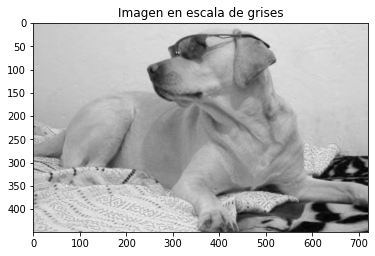

In [67]:
plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

### Aplicamos SVD a la imagen

In [68]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)

In [69]:
print(U.shape)
print(S.shape)
print(V_T.shape)

(449, 449)
(449,)
(449, 720)


In [70]:
img_svd = (U*S)@V_T

In [71]:
img_svd.shape

(449, 720)

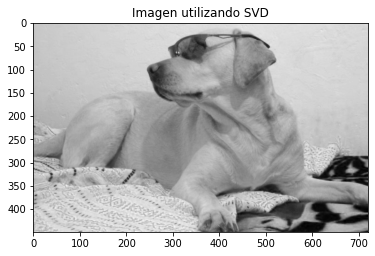

In [72]:
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')
plt.show()

### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

In [73]:
(U[:,0]*S[0]).shape

(449,)

In [74]:
img_svd_1=np.outer((U[:,0]*S[0]),V_T[0,:])

In [75]:
img_svd_1.shape

(449, 720)

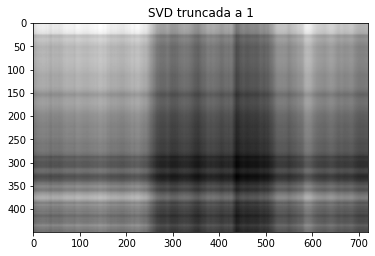

In [76]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')
plt.show()

### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares

In [77]:
img_svd_2=np.outer((U[:,0]*S[0]),V_T[0,:]) + np.outer((U[:,1]*S[1]),V_T[1,:])

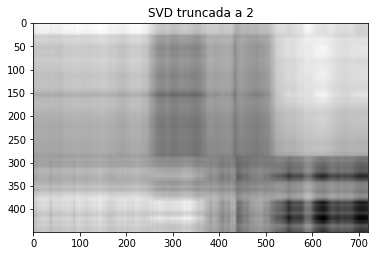

In [78]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')
plt.show()

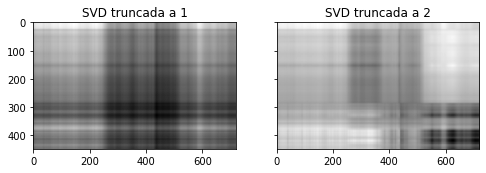

In [79]:
fig, axes = plt.subplots(1, 2, sharey=True) #two subplots will share values in vertical axis
fig.set_figheight(8)
fig.set_figwidth(8)
axes[0].imshow(img_svd_1, cmap="gray") #index 0 for plot at the left
axes[0].set_title("SVD truncada a 1")
axes[1].imshow(img_svd_2, cmap="gray") #index 1 for plot at the left
axes[1].set_title("SVD truncada a 2")
plt.show()

### Otro ejemplo

In [80]:
img=plt.imread('hummingbird.png')

In [81]:
img #Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0

array([[[0.81, 0.7 , 0.65, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        ...,
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ]],

       [[0.81, 0.7 , 0.65, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        ...,
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ]],

       [[0.8 , 0.69, 0.64, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        [0.8 , 0.69, 0.64, 1.  ],
        ...,
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ],
        [0.91, 0.87, 0.71, 1.  ]],

       ...,

       [[0.78, 0.78, 0.55, 1.  ],
        [0.8 , 0.78, 0.55, 1.  ],
        [0.8 , 0.78, 0.55, 1.  ],
        ...,
        [0.8 , 0.79, 0.67, 1.  ],
        [0.8 , 0.79, 0.67, 1.  ],
        [0.8 , 0.8 , 0.67, 1.  ]],

       [[0.78, 0.78, 0.55, 1.  ],
        [0.8 , 0.78, 0.55, 1.  ],
        [0.8 , 0.78, 0.55, 1.  ],
        .

Los datos tienen cuatro canales:

In [82]:
img.shape

(911, 656, 4)

Sólo usaremos uno de ellos

In [83]:
img[:,:,0].shape

(911, 656)

In [84]:
img = img[:,:,0]

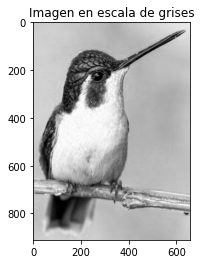

In [85]:
plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')
plt.show()

### Aplicamos SVD a la imagen

In [86]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)

In [87]:
print(U.shape)
print(S.shape)
print(V_T.shape)

(911, 656)
(656,)
(656, 656)


In [88]:
img_svd = (U*S)@V_T

In [89]:
img_svd.shape

(911, 656)

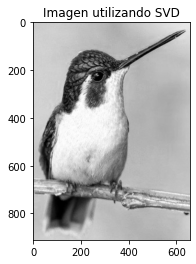

In [90]:
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')
plt.show()

### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

In [91]:
(U[:,0]*S[0]).shape

(911,)

In [92]:
img_svd_1=np.outer((U[:,0]*S[0]),V_T[0,:])

In [93]:
img_svd_1.shape

(911, 656)

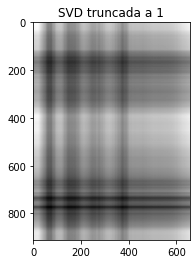

In [94]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')
plt.show()

### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares

In [95]:
img_svd_2=np.outer((U[:,0]*S[0]),V_T[0,:]) + np.outer((U[:,1]*S[1]),V_T[1,:])

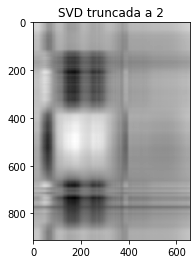

In [96]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')
plt.show()

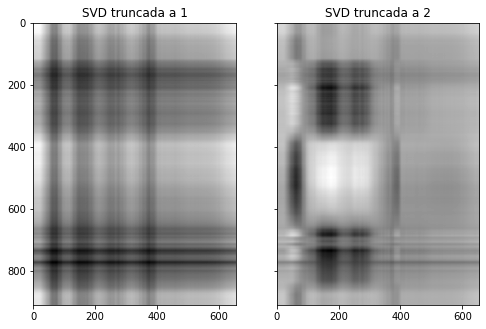

In [97]:
fig, axes = plt.subplots(1, 2, sharey=True) #two subplots will share values in vertical axis
fig.set_figheight(8)
fig.set_figwidth(8)
axes[0].imshow(img_svd_1, cmap="gray") #index 0 for plot at the left
axes[0].set_title("SVD truncada a 1")
axes[1].imshow(img_svd_2, cmap="gray") #index 1 for plot at the left
axes[1].set_title("SVD truncada a 2")
plt.show()

### Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

**Ejercicio1: resolver este caso con alguna de las imágenes anteriores en un jupyter notebook.**

**Ejercicio2: Con una imagen de su elección (puede ser la misma que del ejercicio1) definir un número de vectores singulares izquierdos, derechos y valores singulares de modo que se aprecie la imagen "bien".**

In [102]:
img = plt.imread("Kiara.png")
img = img[:,:,0]

In [106]:
U,S,V_T = np.linalg.svd(img)

In [107]:
l = []

for i in range(51):
    l.append(np.outer((U[:,i]*S[i]),V_T[i,:]))

In [108]:
aux = 0
for n in l:
    aux = aux + n

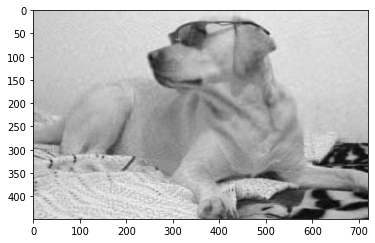

In [109]:
plt.imshow(aux,cmap="gray")
plt.show()

In [110]:
#for loop:
suma = np.outer((U[:,0]*S[0]),V_T[0,:])
for i in range(1,51):
    suma = suma + np.outer((U[:,i]*S[i]),V_T[i,:])

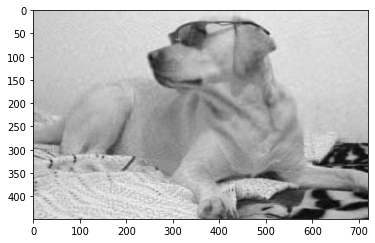

In [111]:
plt.imshow(suma,cmap="gray")
plt.show()

In [113]:
np.linalg.matrix_rank(img)

380

In [115]:
S.shape

(449,)

In [116]:
l = []

for i in range(381):
    l.append(np.outer((U[:,i]*S[i]),V_T[i,:]))

In [117]:
aux = 0
for n in l:
    aux = aux + n

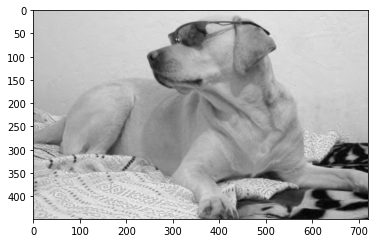

In [118]:
plt.imshow(aux,cmap="gray")
plt.show()

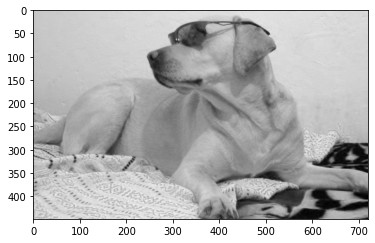

In [121]:
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
X.r